# 5. Análise das características das unidades que ofertam o SFA

As variáveis utilizadas aqui referem-se a características físicas e também de gestão de pessoas das unidades que ofertam SFA.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

In [13]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/dados_gerais_tratado.csv')

In [14]:
df_dados_gerais.head()

,IBGE,NU_IDENTIFICADOR,municipio,uf,data_implementacao_unidade,Latitude,Longitude,natureza_unidade,custo_manutencao,servico_regulamentado,...,coordenador_saf_situacao,capaci_equipe_tec_saf_presencial,capaci_equipe_tec_saf_ead,capaci_equipe_tec_saf_nao_faz,capaci_equipe_tec_saf_presencial_qtd,capaci_equipe_tec_saf_ead_qtd,IBGE7,nome_da_uf,Regiao,Município
0,110011,"1,10011E+12",JARU,RO,29/03/2023,-10.439,-62.466,Governamental,NaN,"Sim, por lei",...,Exerce concomitantemente a função de coordenad...,Não,Não,Não,NaN,NaN,1100114,Rondonia,Região Norte,Jaru
1,110012,"1,10012E+12",JI-PARANA,RO,02/01/2022,-10.876.486.067.028.500,-619.596.290.588.379,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,3.0,4.0,1100122,Rondonia,Região Norte,Ji-Paraná
2,110020,"1,1002E+12",PORTO VELHO,RO,13/12/2017,-915.359.258.390.788,-643.068.141.967.022,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,5.0,5.0,1100205,Rondonia,Região Norte,Porto Velho
3,120040,"1,2004E+12",RIO BRANCO,AC,17/05/2013,-9.948.852.227.687.540,-6.785.414.814.949.030,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1200401,Acre,Região Norte,Rio Branco
4,130170,"1,3017E+12",HUMAITA,AM,28/12/2020,-7.519.639.784.496.380,-63.031.353.950.500.400,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1301704,Amazonas,Região Norte,Humaitá


In [15]:
df_dados_gerais.columns.tolist()

['IBGE',
 'NU_IDENTIFICADOR',
 'municipio',
 'uf',
 'data_implementacao_unidade',
 'Latitude',
 'Longitude',
 'natureza_unidade',
 'custo_manutencao',
 'servico_regulamentado',
 'ano_implementacao_servico',
 'subsidio_valor_mensal',
 'subsidio_itens_manutencao',
 'subsidio_mobiliario_transporte',
 'subsidio_isencao_imposto_taxa',
 'subsidio_outros',
 'subsidio_nao_repassa',
 'subsidio_outros_quais',
 'fam_aceita_vinculo_irmaos',
 'qtd_criancas_acolhidas',
 'qtd_criancas_acolhidas_12meses',
 'qtd_masc_0_2',
 'qtd_masc_3_5',
 'qtd_masc_6_11',
 'qtd_masc_12_13',
 'qtd_masc_14_15',
 'qtd_masc_16_17',
 'qtd_masc_acima_18',
 'qtd_masc_total',
 'qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18',
 'qtd_refugiados_imigrantes',
 'qtd_venezuelanos',
 'qtd_criancas_tempo_servico_menos_1mes',
 'qtd_criancas_tempo_servico_1_3meses',
 'qtd_criancas_tempo_servico_4_6meses',
 'qtd_criancas_tempo_servico_7_12meses',
 'qtd_criancas_te

In [16]:
df_municipios = pd.read_csv('../data/dados_geo/municipios.csv', sep=",")

In [17]:
df_municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [18]:
df_municipios.columns

Index(['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'codigo_uf',
       'siafi_id', 'ddd', 'fuso_horario'],
      dtype='object')

In [19]:
# Realizar o merge entre os DataFrames
df_municipios_dados_gerais_fam = pd.merge(
    df_dados_gerais,
    df_municipios[['codigo_ibge', 'nome', 'latitude', 'longitude', 'codigo_uf','siafi_id']],
    left_on='IBGE7',
    right_on='codigo_ibge',
    how='inner'
)

In [20]:
df_municipios_dados_gerais_fam.head()

,IBGE,NU_IDENTIFICADOR,municipio,uf,data_implementacao_unidade,Latitude,Longitude,natureza_unidade,custo_manutencao,servico_regulamentado,...,IBGE7,nome_da_uf,Regiao,Município,codigo_ibge,nome,latitude,longitude,codigo_uf,siafi_id
0,110011,"1,10011E+12",JARU,RO,29/03/2023,-10.439,-62.466,Governamental,NaN,"Sim, por lei",...,1100114,Rondonia,Região Norte,Jaru,1100114,Jaru,-10.43180,-62.4788,11,15
1,110012,"1,10012E+12",JI-PARANA,RO,02/01/2022,-10.876.486.067.028.500,-619.596.290.588.379,Governamental,NaN,"Sim, por lei",...,1100122,Rondonia,Região Norte,Ji-Paraná,1100122,Ji-Paraná,-10.87770,-61.9322,11,5
2,110020,"1,1002E+12",PORTO VELHO,RO,13/12/2017,-915.359.258.390.788,-643.068.141.967.022,Governamental,NaN,"Sim, por lei",...,1100205,Rondonia,Região Norte,Porto Velho,1100205,Porto Velho,-8.76077,-63.8999,11,3
3,120040,"1,2004E+12",RIO BRANCO,AC,17/05/2013,-9.948.852.227.687.540,-6.785.414.814.949.030,Governamental,NaN,"Sim, por lei",...,1200401,Acre,Região Norte,Rio Branco,1200401,Rio Branco,-9.97499,-67.8243,12,139
4,130170,"1,3017E+12",HUMAITA,AM,28/12/2020,-7.519.639.784.496.380,-63.031.353.950.500.400,Governamental,NaN,"Sim, por lei",...,1301704,Amazonas,Região Norte,Humaitá,1301704,Humaitá,-7.51171,-63.0327,13,235


## 5.1. Distribuição geográfica das unidades de acolhimento que ofertam o SFA

In [21]:
df_agrupado = df_municipios_dados_gerais_fam.groupby(['IBGE7', 'Município']).size().reset_index(name='QuantidadeServicos')

In [22]:
# Obter coordenadas únicas por IBGE e Município
coordenadas = df_municipios_dados_gerais_fam[['IBGE7', 'Município', 'latitude', 'longitude']].drop_duplicates()

# Mesclar as coordenadas com os dados agrupados
df_agrupado = df_agrupado.merge(coordenadas, on=['IBGE7', 'Município'])

In [23]:
# Criar o mapa centralizado
mapa_servicos = folium.Map(
    location=[df_agrupado['latitude'].mean(), df_agrupado['longitude'].mean()],
    zoom_start=5,
    tiles='CartoDB positron'
)

# Adicionar marcadores para cada município
for _, row in df_agrupado.iterrows():
    popup_text = f"Município: {row['Município']}<br>Quantidade de SAF: {row['QuantidadeServicos']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
    ).add_to(mapa_servicos)

# Exibir o mapa
mapa_servicos

## 5.2. Análise da temporalidade das unidades que ofertam o serviço em 2023

In [24]:
df_dados_gerais['data_implementacao_unidade'] = pd.to_datetime(
    df_dados_gerais['data_implementacao_unidade'], 
    format='%d/%m/%Y',  # Define explicitamente o formato
    errors='coerce'  # Transforma valores inválidos em NaT
)

In [25]:
df_dados_gerais['ano_implementacao_servico']

0      2023
1      2022
2      2018
3      2013
4      2021
       ... 
615    2016
616    2016
617    2021
618    2007
619    2018
Name: ano_implementacao_servico, Length: 620, dtype: int64

### 5.2.1. Data de implementação das unidades que ofertam o serviço

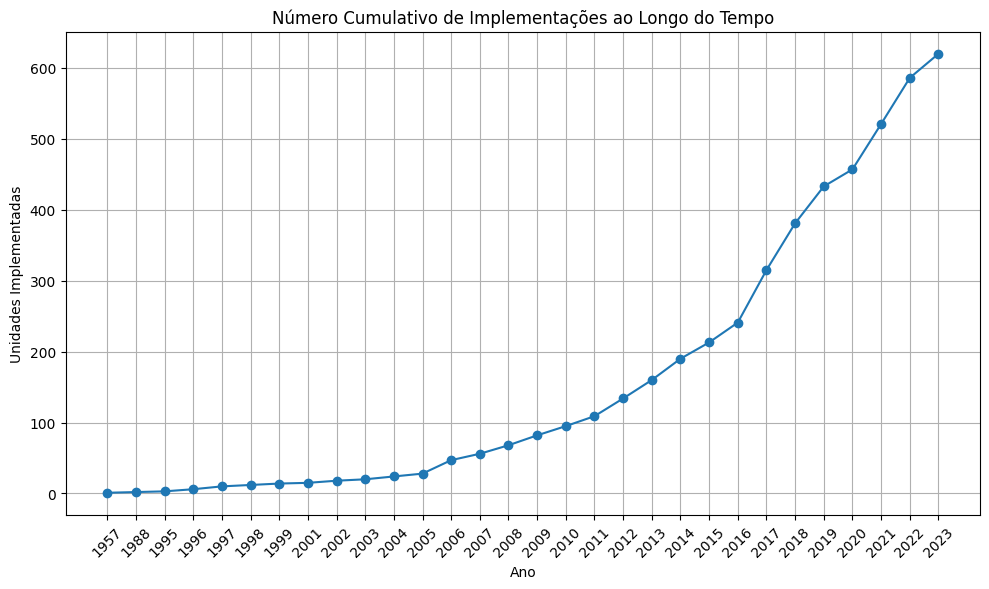

In [26]:
# Contar implementações cumulativas ao longo do tempo
df_dados_gerais['ano_implementacao'] = df_dados_gerais['data_implementacao_unidade'].dt.to_period('Y')
serie_temporal = df_dados_gerais.groupby('ano_implementacao').size().cumsum()

plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index.astype(str), serie_temporal, marker='o')
plt.title('Número Cumulativo de Implementações ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Unidades Implementadas')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

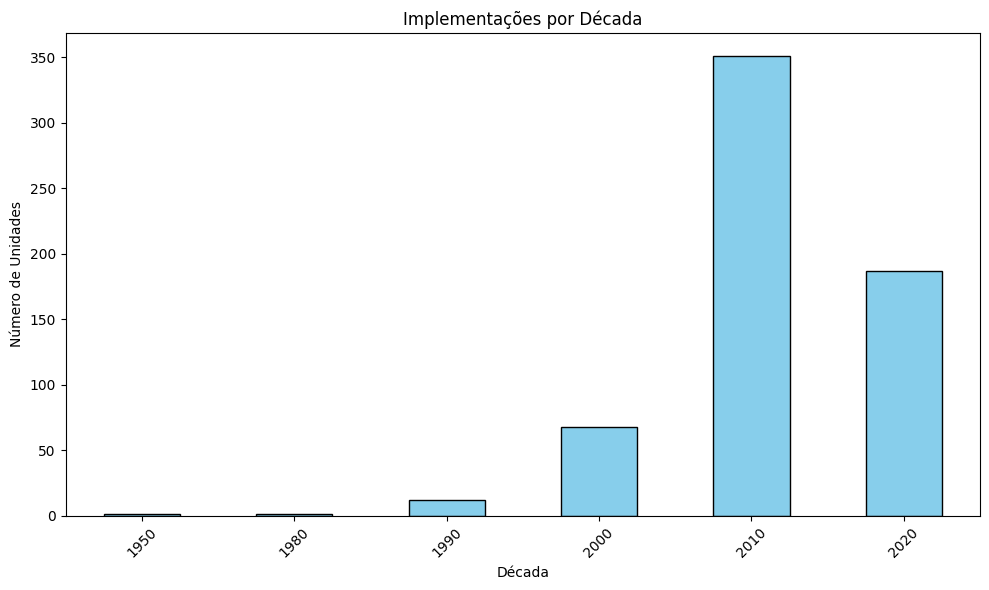

In [27]:
# Contar implementações por década
df_dados_gerais['decada'] = (df_dados_gerais['data_implementacao_unidade'].dt.year // 10) * 10
implementacoes_decada = df_dados_gerais.groupby('decada').size()

implementacoes_decada.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='k')
plt.title('Implementações por Década')
plt.xlabel('Década')
plt.ylabel('Número de Unidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.2.2. Data de implementação do serviço nas unidades

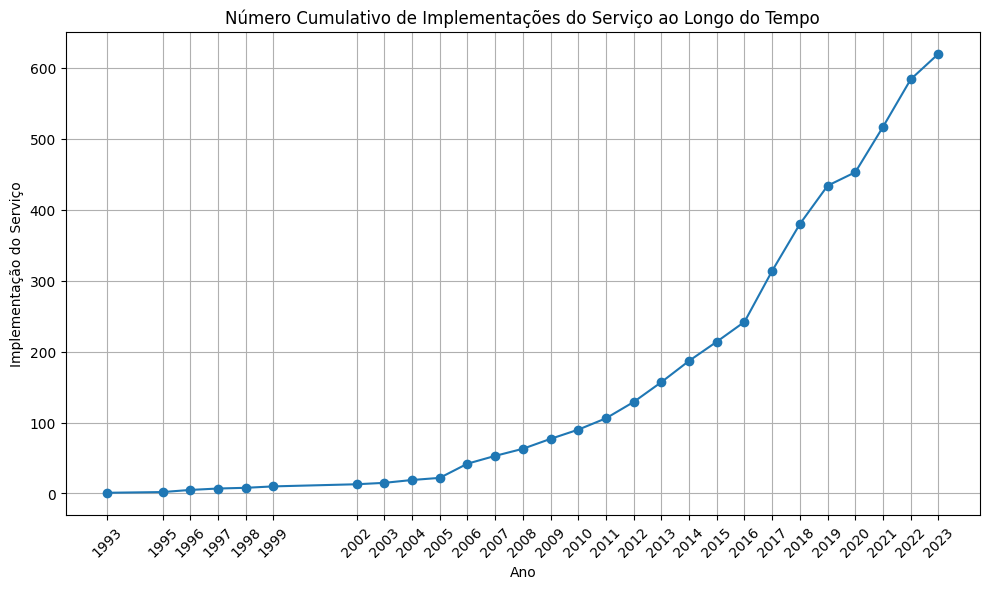

In [28]:
# Contar implementações cumulativas ao longo do tempo
serie_temporal = df_dados_gerais.groupby('ano_implementacao_servico').size().cumsum()

plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal, marker='o')
plt.title('Número Cumulativo de Implementações do Serviço ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Implementação do Serviço')
plt.xticks(serie_temporal.index, rotation=45)  # Rotaciona os rótulos do eixo X
plt.grid()
plt.tight_layout()
plt.show()

## 5.3. Análise da natureza da unidade que oferta o serviço

In [29]:
df_municipios_dados_gerais_fam['natureza_unidade'].value_counts()

Governamental                                       568
Não Governamental/Organização da Sociedade Civil     41
Name: natureza_unidade, dtype: int64

In [30]:
natureza_unidade = df_municipios_dados_gerais_fam[
    df_municipios_dados_gerais_fam['natureza_unidade'] == 'Não Governamental/Organização da Sociedade Civil'
].groupby('uf')

In [31]:
df_natureza_unidade = natureza_unidade.size().reset_index(name='contagem')

In [32]:
df_natureza_unidade

,uf,contagem
0,AM,2
1,DF,1
2,MG,7
3,PE,1
4,PI,1
5,PR,3
6,RS,1
7,SC,2
8,SP,23


## 5.4. Análise do custo mensal de manutenção do serviço no mês de setembro de 2023

Considerando os gastos com salários, aluguel da sede, telefone, etc (EXCLUINDO o valor dos subsídios repassados às famílias acolhedoras)

In [33]:
# Define cores para cada região
cores_regiao = {
    'Região Norte': 'blue', 'Região Nordeste': 'green', 'Região Centro Oeste': 'orange',
    'Região Sudeste': 'red', 'Região Sul': 'purple'
}

In [34]:
df_dados_gerais['custo_manutencao'].isna().sum()

582

In [35]:
df_dados_gerais['custo_manutencao'].unique()

array([nan, '20439,53', '10000', '115428,62', '29531,09', '10685,43',
       '44365,81', '24051,26', '8714,9', '108321', '16933', '13750',
       '186177,25', '50504,6', '73232,9', '31120,18', '33793,75', '39000',
       '32306,42', '7553,22', '39684,01', '40000', '24590', '39690,92',
       '0', '24436,82', '61566,45', '55329,74', '64294,53', '42831,88',
       '46477,93', '15538,98', '20330,64', '21000', '50688,5', '28656,79',
       '22580,51', '26453,97', '29300,42'], dtype=object)

In [36]:
df_dados_gerais['custo_manutencao'] = df_dados_gerais['custo_manutencao'].str.replace(',', '.')

In [37]:
# Remover espaços em branco (se houver)
df_dados_gerais['custo_manutencao'] = df_dados_gerais['custo_manutencao'].str.strip()

In [38]:
df_dados_gerais['custo_manutencao'] = pd.to_numeric(df_dados_gerais['custo_manutencao'], errors='coerce')

In [39]:
df_dados_gerais['custo_manutencao'] = df_dados_gerais['custo_manutencao'].fillna(0)

In [40]:
# Calcula a média de custo de manutenção do serviço por UF
media_custo_uf = df_dados_gerais.groupby(['uf', 'Regiao'])['custo_manutencao'].mean().reset_index()

In [41]:
media_custo_uf.isna().sum()

uf                  0
Regiao              0
custo_manutencao    0
dtype: int64

In [42]:
media_custo_uf.sort_values(by='custo_manutencao', ascending=False)

,uf,Regiao,custo_manutencao
22,SP,Região Sudeste,16827.074035
9,MG,Região Sudeste,3553.105312
1,AM,Região Norte,2919.932857
14,PE,Região Nordeste,1250.000000
16,PR,Região Sul,765.994580
20,RS,Região Sul,751.292821
21,SC,Região Sul,466.995048
0,AC,Região Norte,0.000000
13,PB,Região Nordeste,0.000000
19,RO,Região Norte,0.000000


In [43]:
# Remove valores onde custo_manutencao é igual a 0
df_filtrado_custo = df_dados_gerais[df_dados_gerais['custo_manutencao'] != 0]

# Calcula a média de custo de manutenção do serviço por UF, excluindo os valores 0
media_custo_municipio = df_filtrado_custo.groupby(['uf', 'Município'])['custo_manutencao'].mean().reset_index()

# Exibe o resultado
print(media_custo_municipio)

    uf              Município  custo_manutencao
0   AM                 Manaus         20439.530
1   MG         Belo Horizonte        115428.620
2   MG                  Betim         29531.090
3   MG            Divinópolis         10685.430
4   MG          Imbé de Minas         44365.810
5   MG           Juiz de Fora         24051.260
6   MG        Poços de Caldas          8714.900
7   MG             Uberlândia        108321.000
8   PE                 Olinda         10000.000
9   PR               Curitiba         21000.000
10  PR          Foz do Iguaçu         50688.500
11  PR               Londrina         28656.790
12  RS           Porto Alegre         29300.420
13  SC                Caçador         22580.510
14  SC          Florianópolis         26453.970
15  SP              Americana         16933.000
16  SP                Atibaia         13750.000
17  SP                  Bauru        118340.925
18  SP               Campinas         73232.900
19  SP               Capivari         31

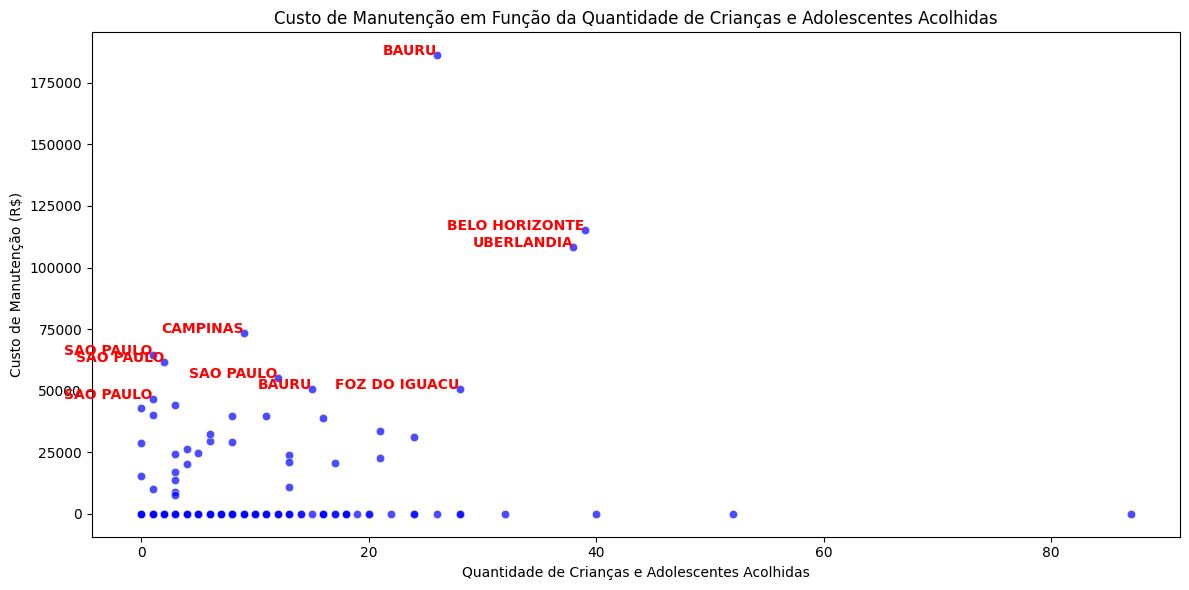

In [44]:
# Selecionar os municípios com maiores custos (Top 10)
top_custos = df_dados_gerais.nlargest(10, 'custo_manutencao')

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_dados_gerais,
    x='qtd_criancas_acolhidas',
    y='custo_manutencao',
    color='blue',
    alpha=0.7
)

# Adicionar rótulos aos maiores custos
for i, row in top_custos.iterrows():
    plt.text(
        row['qtd_criancas_acolhidas'],  # Coordenada X
        row['custo_manutencao'],  # Coordenada Y
        row['municipio'],  # Texto (nome do município)
        horizontalalignment='right',
        size='medium',
        color='red',
        weight='semibold'
    )

# Configurar o gráfico
plt.title('Custo de Manutenção em Função da Quantidade de Crianças e Adolescentes Acolhidas')
plt.xlabel('Quantidade de Crianças e Adolescentes Acolhidas')
plt.ylabel('Custo de Manutenção (R$)')
plt.tight_layout()
plt.show()

## 5.5. Análise da estrutura física do serviço

A variável 'imovel_sede_saf' refere-se à situação do imóvel onde funciona a Sede do Serviço de Família Acolhedora - SFA.

As seguintes variáveis estão relacionadas aos espaços físicos que compõem a sede do SFA:
- 'espaco_fisico_sala_atendimento': Sala para atendimento 
- 'espaco_fisico_espaco_reunioes': Sala/espaço para reuniões
- 'espaco_fisico_sala_equip_tec': Sala para equipe técnica 
- 'espaco_fisico_sala_coord_adm': Sala para coordenação / atividades administrativas 
- 'espaco_fisico_area_recepcao': Área de recepção 
- 'espaco_fisico_copa': Copa 

As seguintes variáveis indicam os equipamentos e materiais, em perfeito funcionamento, à disposição deste serviço:
- 'equipamentos_veiculo_exclusivo': Veículo de uso exclusivo
- 'equipamentos_veiculo_compartilhado': Veículo de uso compartilhado
- 'equipamentos_acervo_bibliog': Acervo bibliográfico (livros)
- 'equipamentos_mater_pedago': Materiais pedagógicos, jogos, brinquedos
- 'equipamentos_tel_fixo': Telefone fixo
- 'equipamentos_cel': Celular
- 'equipamentos_impressora': Impressora
- 'equipamentos_de_som': Equipamento de som
- 'equipamentos_proj_imagens': Equipamento de projeção de imagens
- 'equipamentos_bebedouro': Bebedouro e/ou filtro
- 'equipamentos_comput_internet': Computadores ligados à Internet
- 'equipamentos_qtd_comput_internet': Quantidade de computadores ligados à Internet

### 5.5.1. Situação do imóvel onde funciona a sede do SFA

In [45]:
df_dados_gerais['imovel_sede_saf'].value_counts()

Imóvel compartilhado com outro serviço ou órgão    317
Imóvel exclusivo para o SFA                        104
Imóvel compartilhado com CREAS                     102
Imóvel compartilhado com CRAS                       64
O SFA não possui sede                               33
Name: imovel_sede_saf, dtype: int64

In [46]:
df_dados_gerais['imovel_sede_saf'].dtype

dtype('O')

In [47]:
# Agrupa os dados por 'uf' e 'imovel_sede_saf' e conta as ocorrências
contagem_por_uf_sede= df_dados_gerais.groupby(['uf', 'imovel_sede_saf']).size().reset_index(name='contagem')

In [48]:
contagem_por_uf_sede

,uf,imovel_sede_saf,contagem
0,AC,Imóvel exclusivo para o SFA,1
1,AM,Imóvel compartilhado com CREAS,3
2,AM,Imóvel compartilhado com outro serviço ou órgão,2
3,AM,O SFA não possui sede,2
4,AP,Imóvel compartilhado com CRAS,1
...,...,...,...
79,SP,Imóvel compartilhado com outro serviço ou órgão,26
80,SP,Imóvel exclusivo para o SFA,20
81,SP,O SFA não possui sede,4
82,TO,Imóvel compartilhado com outro serviço ou órgão,6


In [49]:
# Transformar o DataFrame para o formato de tabela cruzada
grafico_data_sede = contagem_por_uf_sede.pivot(index='uf', columns='imovel_sede_saf', values='contagem').fillna(0)

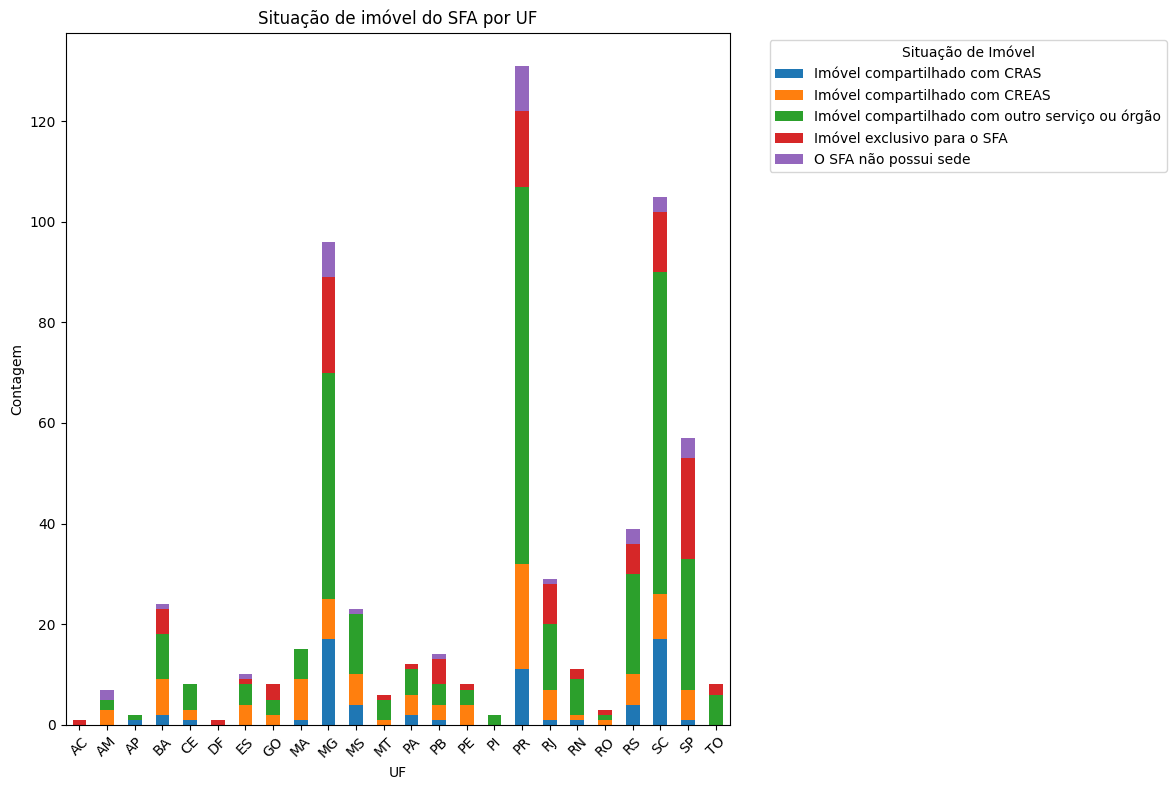

In [50]:
# Criar o gráfico de barras empilhadas
grafico_data_sede.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    title="Situação de imóvel do SFA por UF"
)

# Adicionar rótulos ao gráfico
plt.ylabel("Contagem")
plt.xlabel("UF")
plt.xticks(rotation=45)
plt.legend(title='Situação de Imóvel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [51]:
# Agrupa os dados por 'uf' e 'imovel_sede_saf' e conta as ocorrências
contagem_por_uf_sede = df_dados_gerais.groupby(['uf', 'imovel_sede_saf']).size().reset_index(name='contagem')

# Transformar o DataFrame para o formato de tabela cruzada
grafico_data_sede = contagem_por_uf_sede.pivot(index='uf', columns='imovel_sede_saf', values='contagem').fillna(0)

# Calcular o total por UF
grafico_data_sede['TOTAL'] = grafico_data_sede.sum(axis=1)

# Calcular o percentual para cada categoria (cada valor dividido pelo total)
grafico_data_sede_pct = grafico_data_sede.div(grafico_data_sede['TOTAL'], axis=0) * 100

# Remover a coluna 'TOTAL' para não aparecer no gráfico
grafico_data_sede_pct = grafico_data_sede_pct.drop(columns='TOTAL')

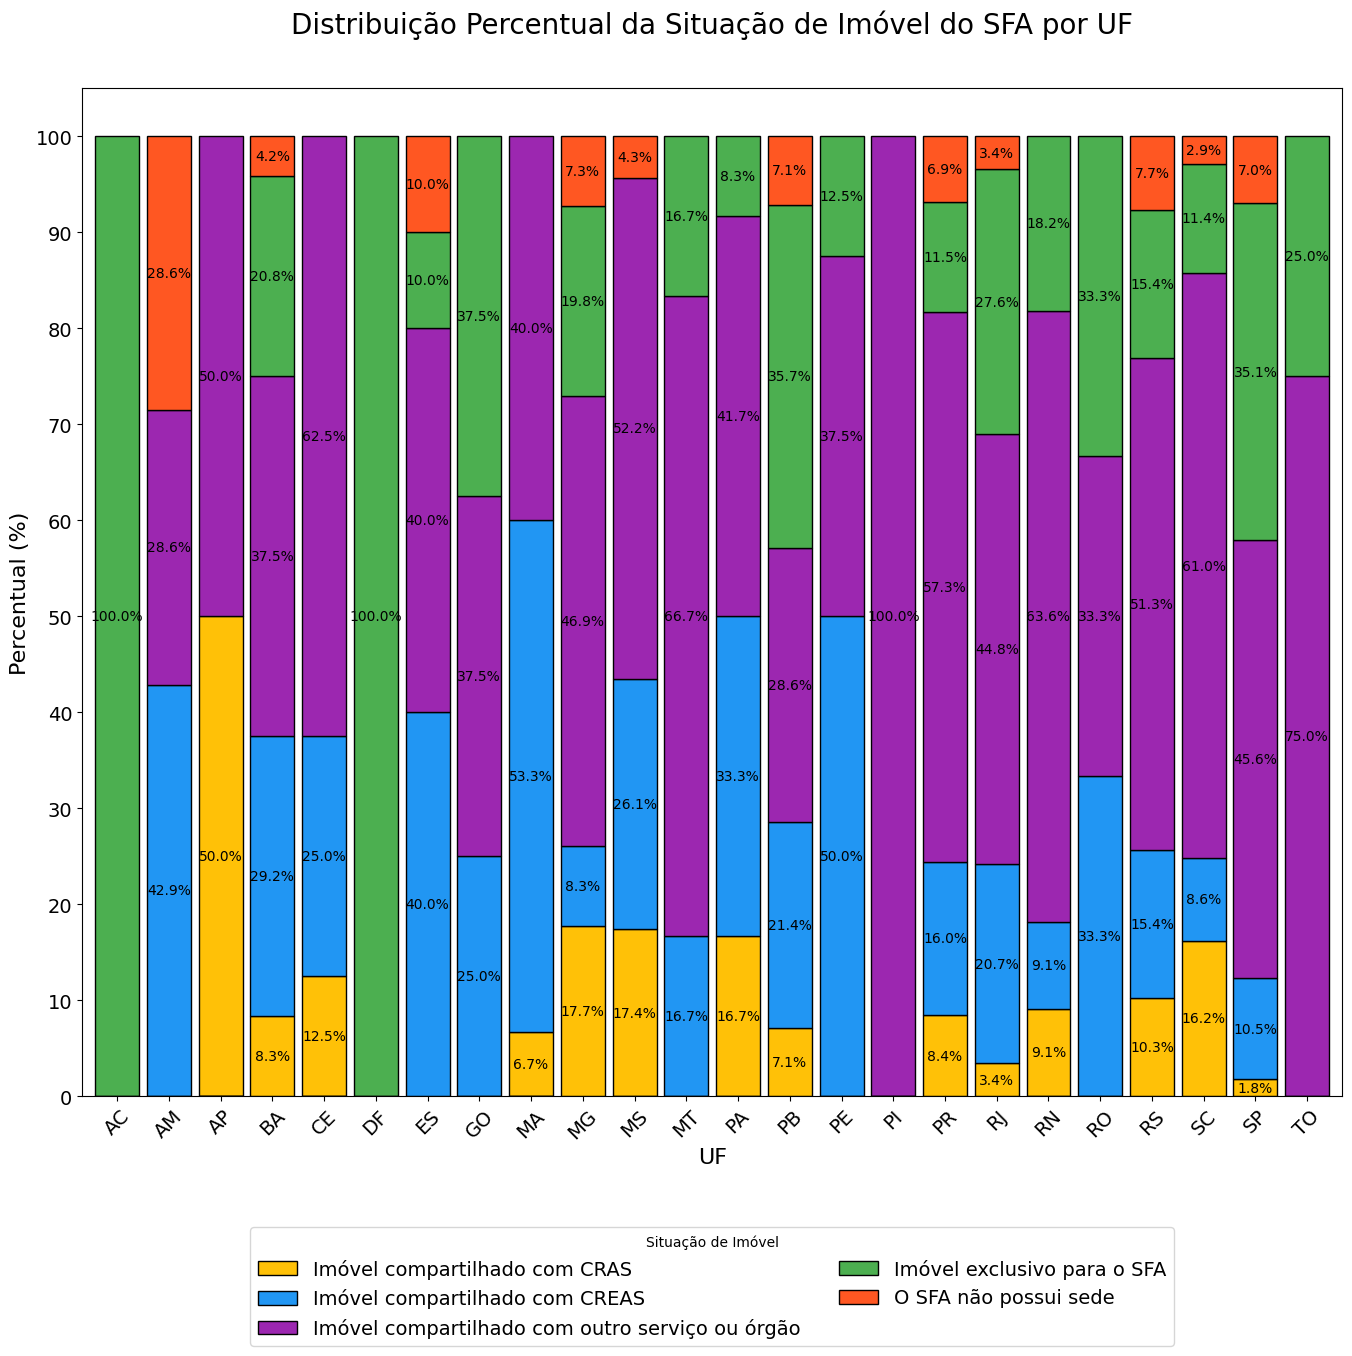

In [52]:
# Definir cores ajustadas para cada categoria
cores_sede = {
    'Imóvel compartilhado com outro serviço ou órgão': '#9C27B0',  # Roxo
    'Imóvel exclusivo para o SFA': '#4CAF50',                      # Verde
    'Imóvel compartilhado com CREAS': '#2196F3',                   # Azul
    'Imóvel compartilhado com CRAS': '#FFC107',                    # Amarelo
    'O SFA não possui sede': '#FF5722'                             # Vermelho
}

# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(18, 16))  # Tamanho maior para acomodar tudo

# Gráfico de barras empilhadas com cores personalizadas
grafico_data_sede_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[cores_sede[col] for col in grafico_data_sede_pct.columns],
    edgecolor='black',
    width=0.85
)

# Adicionar valores dentro das barras
for i, column in enumerate(grafico_data_sede_pct.columns):
    for idx in range(len(grafico_data_sede_pct)):
        value = grafico_data_sede_pct.iloc[idx, i]
        if value > 0:  # Exibir apenas valores maiores que zero
            cumulative_value = grafico_data_sede_pct.iloc[idx, :i].sum()
            ax.text(
                idx, 
                cumulative_value + value / 2,  # Posicionar no meio da barra
                f'{value:.1f}%',  # Formatar para porcentagem
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

# Ajustar rótulos e título
ax.set_title('Distribuição Percentual da Situação de Imóvel do SFA por UF', fontsize=20, pad=40)
ax.set_xlabel('UF', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_xticks(range(len(grafico_data_sede_pct.index)))
ax.set_xticklabels(grafico_data_sede_pct.index, rotation=45, fontsize=14)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis='y', labelsize=14)

# Reposicionar e redimensionar a legenda
ax.legend(
    title='Situação de Imóvel',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=2,
    fontsize=14
)

# Ajustar espaçamento manualmente para maximizar o espaço do gráfico
plt.subplots_adjust(
    top=0.88,
    bottom=0.25,
    left=0.2,
    right=0.9
)

# Mostrar o gráfico
plt.show()

### 5.5.2. Descrição dos espaços físicos que compõem a sede do SFA

In [53]:
colunas_espaco_fisico = ['espaco_fisico_sala_atendimento',
    'espaco_fisico_espaco_reunioes',
    'espaco_fisico_sala_equip_tec',
    'espaco_fisico_sala_coord_adm',
    'espaco_fisico_area_recepcao',
    'espaco_fisico_copa']

In [54]:
df_dados_gerais[colunas_espaco_fisico].isna().sum()

espaco_fisico_sala_atendimento    0
espaco_fisico_espaco_reunioes     0
espaco_fisico_sala_equip_tec      0
espaco_fisico_sala_coord_adm      0
espaco_fisico_area_recepcao       0
espaco_fisico_copa                0
dtype: int64

In [55]:
contagem_espaco_fisico = pd.DataFrame({coluna: df_dados_gerais[coluna].value_counts() for coluna in colunas_espaco_fisico})

In [56]:
contagem_espaco_fisico = contagem_espaco_fisico.T

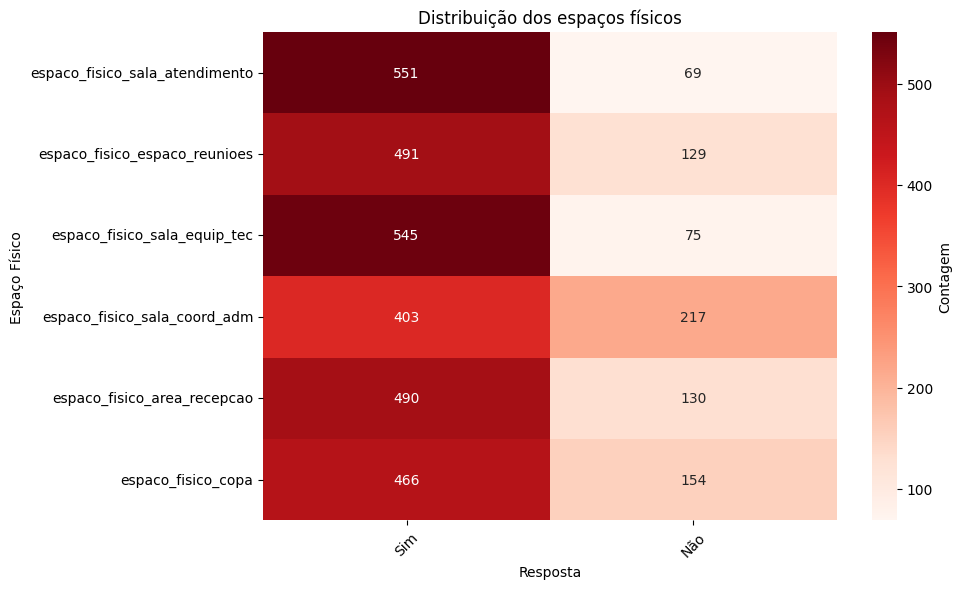

In [57]:
# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    contagem_espaco_fisico,
    annot=True,  # Exibir os valores dentro do heatmap
    fmt=".0f",   # Formato dos números
    cmap="Reds",  # Escolha da paleta de cores
    cbar_kws={'label': 'Contagem'}  # Rótulo da barra de cores
)

# Configurações do gráfico
plt.title("Distribuição dos espaços físicos")
plt.xlabel("Resposta")
plt.ylabel("Espaço Físico")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5.5.3. Descrição dos equipamentos que compõem a sede do SFA

In [58]:
colunas_equipamentos = ['equipamentos_veiculo_exclusivo',
 'equipamentos_veiculo_compartilhado',
 'equipamentos_acervo_bibliog',
 'equipamentos_mater_pedago',
 'equipamentos_tel_fixo',
 'equipamentos_cel',
 'equipamentos_impressora',
 'equipamentos_de_som',
 'equipamentos_proj_imagens',
 'equipamentos_bebedouro',
 'equipamentos_comput_internet',]

In [59]:
df_dados_gerais[colunas_equipamentos].isna().sum()

equipamentos_veiculo_exclusivo        0
equipamentos_veiculo_compartilhado    0
equipamentos_acervo_bibliog           0
equipamentos_mater_pedago             0
equipamentos_tel_fixo                 0
equipamentos_cel                      0
equipamentos_impressora               0
equipamentos_de_som                   0
equipamentos_proj_imagens             0
equipamentos_bebedouro                0
equipamentos_comput_internet          0
dtype: int64

In [60]:
contagem_equipamentos = pd.DataFrame({coluna: df_dados_gerais[coluna].value_counts() for coluna in colunas_equipamentos})

In [61]:
contagem_equipamentos = contagem_equipamentos.T

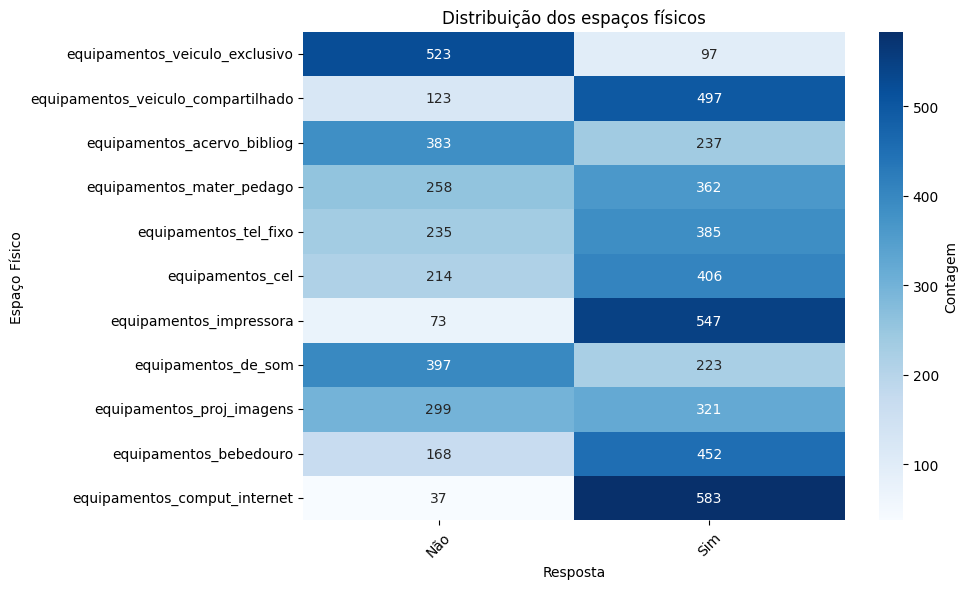

In [62]:
# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    contagem_equipamentos,
    annot=True,  # Exibir os valores dentro do heatmap
    fmt=".0f",   # Formato dos números
    cmap="Blues",  # Escolha da paleta de cores
    cbar_kws={'label': 'Contagem'}  # Rótulo da barra de cores
)

# Configurações do gráfico
plt.title("Distribuição dos espaços físicos")
plt.xlabel("Resposta")
plt.ylabel("Espaço Físico")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 5.6. Variáveis relacionadas aos profissonais do SFA

A variável 'equipe_tec_exclusiva_saf' refere-se à exclusividade da equipe técnica que trabalha com o SFA. Já a 'coordenador_saf_situacao' refere-se à situação do coordenador do SAF.

As seguintes variáveis referem-se à participação, nos últimos 12 meses, das(os) profissionais do serviço em capacitação sobre o Serviço de Acolhimento em Família Acolhedora ou sobre temas relativos a crianças e adolescentes: 
- 'capaci_equipe_tec_saf_presencial': Sim, capacitação presencial
- 'capaci_equipe_tec_saf_ead': Sim, capacitação à distância
- 'capaci_equipe_tec_saf_nao_faz': Não
- 'capaci_equipe_tec_saf_presencial_qtd': Quantidade de profissionais na capacitação presencial
- 'capaci_equipe_tec_saf_ead_qtd': Quantidade de profissionais na capacitação EaD

### 5.6.1. Exclusividade da equipe técnica do SFA

In [63]:
df_dados_gerais['equipe_tec_exclusiva_saf'].value_counts()

Não há profissionais exclusivas(os) do serviço    309
Todas(os) as(os) profissionais são exclusivos     225
Parte da equipe é exclusiva                        79
Não há equipe técnica neste Serviço                 7
Name: equipe_tec_exclusiva_saf, dtype: int64

In [64]:
# Agrupa os dados por 'uf' e 'equipe_tec_exclusiva_saf' e conta as ocorrências
contagem_por_uf_equipe= df_dados_gerais.groupby(['uf', 'equipe_tec_exclusiva_saf']).size().reset_index(name='contagem')

In [65]:
# Transformar o DataFrame para o formato de tabela cruzada
grafico_data_equipe = contagem_por_uf_equipe.pivot(index='uf', columns='equipe_tec_exclusiva_saf', values='contagem').fillna(0)

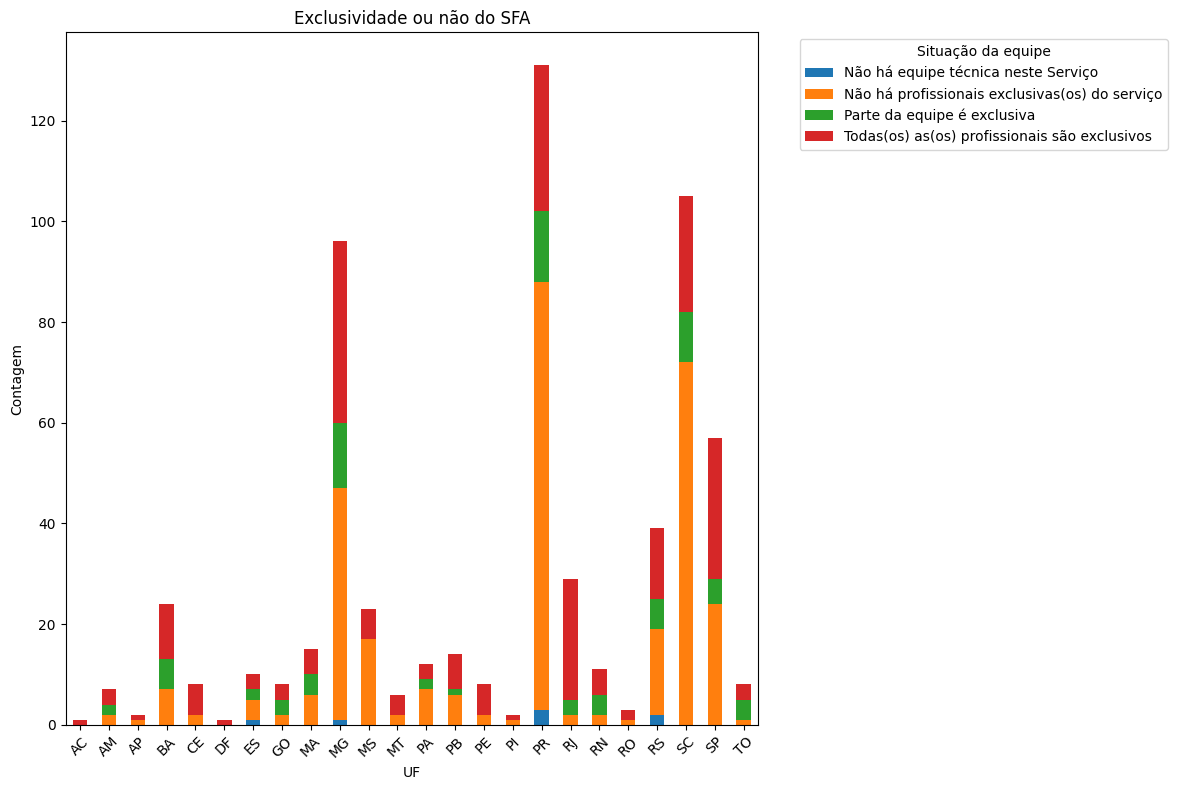

In [66]:
# Criar o gráfico de barras empilhadas
grafico_data_equipe.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    title='Exclusividade ou não do SFA'
)

# Adicionar rótulos ao gráfico
plt.ylabel('Contagem')
plt.xlabel('UF')
plt.xticks(rotation=45)
plt.legend(title='Situação da equipe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

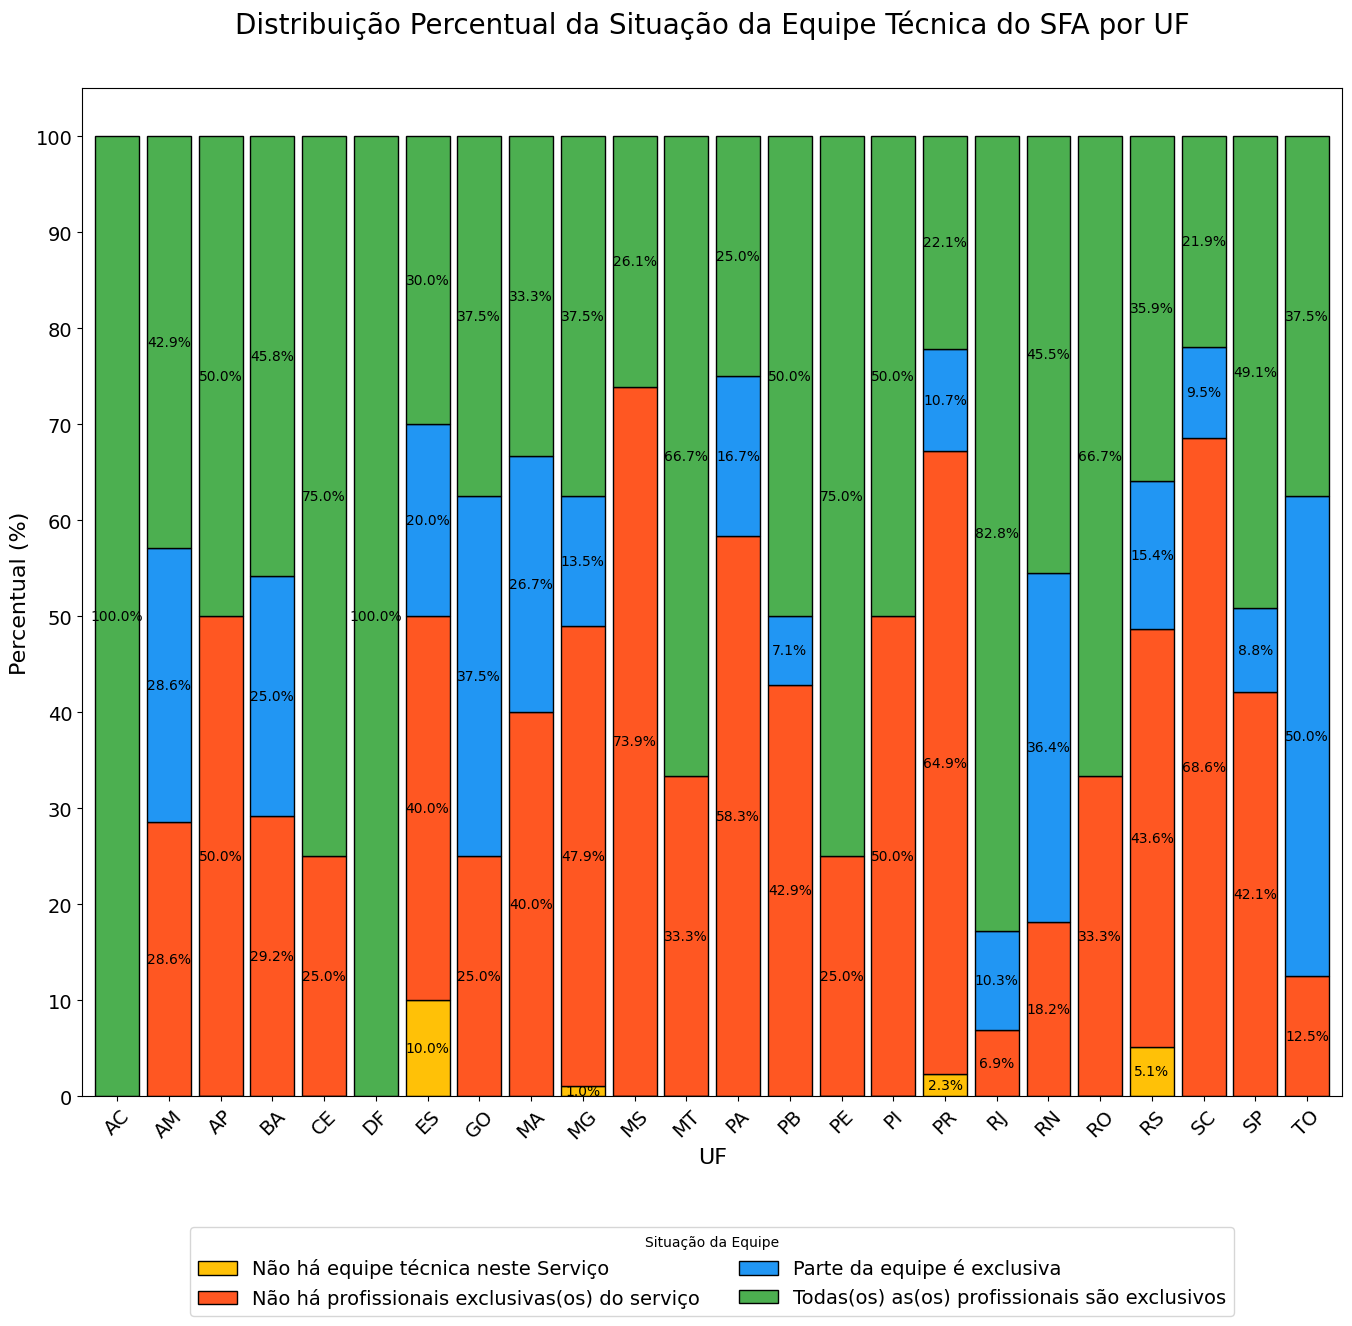

In [67]:
# Definir cores distintas para cada categoria
cores_equipe = {
    'Não há profissionais exclusivas(os) do serviço': '#FF5722',  # Vermelho
    'Todas(os) as(os) profissionais são exclusivos': '#4CAF50',   # Verde
    'Parte da equipe é exclusiva': '#2196F3',                     # Azul
    'Não há equipe técnica neste Serviço': '#FFC107'              # Amarelo
}

# Calcular o total por UF
grafico_data_equipe['TOTAL'] = grafico_data_equipe.sum(axis=1)

# Calcular o percentual para cada categoria
grafico_data_equipe_pct = grafico_data_equipe.div(grafico_data_equipe['TOTAL'], axis=0) * 100

# Remover a coluna 'TOTAL' para não interferir no gráfico
grafico_data_equipe_pct = grafico_data_equipe_pct.drop(columns='TOTAL')

# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(18, 16))  # Tamanho maior para acomodar tudo

# Gráfico de barras empilhadas com cores personalizadas
grafico_data_equipe_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[cores_equipe[col] for col in grafico_data_equipe_pct.columns],
    edgecolor='black',
    width=0.85
)

# Adicionar valores dentro das barras
for i, column in enumerate(grafico_data_equipe_pct.columns):
    for idx in range(len(grafico_data_equipe_pct)):
        value = grafico_data_equipe_pct.iloc[idx, i]
        if value > 0:  # Exibir apenas valores maiores que zero
            cumulative_value = grafico_data_equipe_pct.iloc[idx, :i].sum()
            ax.text(
                idx, 
                cumulative_value + value / 2,  # Posicionar no meio da barra
                f'{value:.1f}%',  # Formatar para porcentagem
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

# Ajustar rótulos e título
ax.set_title('Distribuição Percentual da Situação da Equipe Técnica do SFA por UF', fontsize=20, pad=40)
ax.set_xlabel('UF', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_xticks(range(len(grafico_data_equipe_pct.index)))
ax.set_xticklabels(grafico_data_equipe_pct.index, rotation=45, fontsize=14)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis='y', labelsize=14)

# Reposicionar e redimensionar a legenda
ax.legend(
    title='Situação da Equipe',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=2,
    fontsize=14
)

# Ajustar espaçamento manualmente para maximizar o espaço do gráfico
plt.subplots_adjust(
    top=0.88,
    bottom=0.25,
    left=0.2,
    right=0.9
)

# Mostrar o gráfico
plt.show()

### 5.6.2. Exclusividade do coordenador do SFA

In [68]:
df_dados_gerais['coordenador_saf_situacao'].value_counts()

Exerce exclusivamente a função de coordenador(a) deste serviço                                            172
Exerce concomitantemente a função de coordenador(a) deste serviço e de outro serviço socioassistencial    160
Acumula as funções de coordenadora(or) e de técnica(o) neste serviço                                      102
Acumula as funções de coordenadora(or) com outra atividade                                                 99
Não há coordenadora(or) neste serviço                                                                      87
Name: coordenador_saf_situacao, dtype: int64

In [69]:
# Agrupa os dados por 'uf' e 'coordenador_saf_situacao' e conta as ocorrências
contagem_por_uf_coordenador = df_dados_gerais.groupby(['uf', 'coordenador_saf_situacao']).size().reset_index(name='contagem')

In [70]:
# Transformar o DataFrame para o formato de tabela cruzada
grafico_data_coordenador = contagem_por_uf_coordenador.pivot(index='uf', columns='coordenador_saf_situacao', values='contagem').fillna(0)

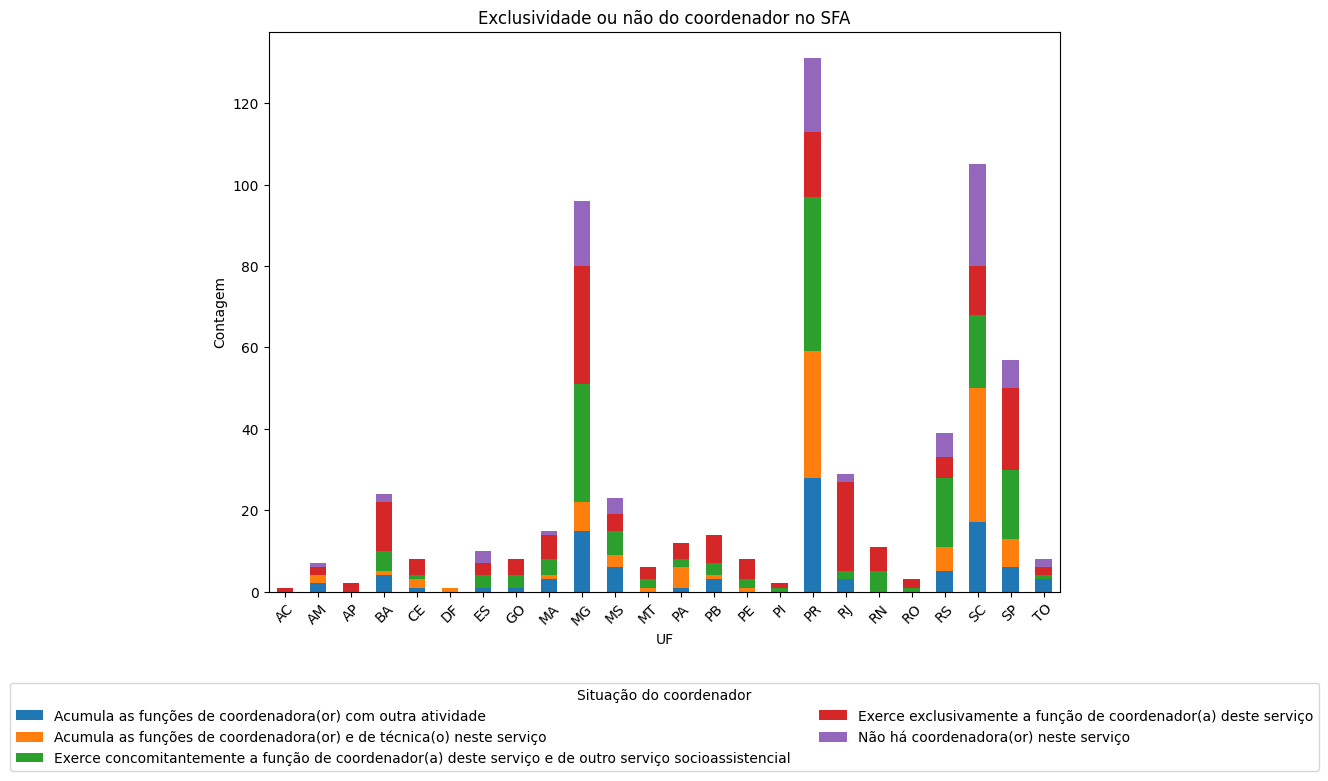

In [71]:
# Criar o gráfico
grafico_data_coordenador.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    title='Exclusividade ou não do coordenador no SFA'
)

# Adicionar rótulos ao gráfico
plt.ylabel('Contagem')
plt.xlabel('UF')
plt.xticks(rotation=45)

# Colocar a legenda abaixo do gráfico
plt.legend(
    title='Situação do coordenador', 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15), 
    ncol=2  # Distribuir legendas em 2 colunas
)

plt.tight_layout()
plt.show()

In [75]:
grafico_data_coordenador = contagem_por_uf_coordenador.pivot(
    index='uf',
    columns='coordenador_saf_situacao',
    values='contagem'
).fillna(0)

# Adicionar coluna de total
grafico_data_coordenador['TOTAL'] = grafico_data_coordenador.sum(axis=1)

# Calcular os percentuais
grafico_data_coordenador_pct = grafico_data_coordenador.div(grafico_data_coordenador['TOTAL'], axis=0) * 100

# Remover a coluna 'TOTAL' para não interferir no gráfico
grafico_data_coordenador_pct = grafico_data_coordenador_pct.drop(columns='TOTAL')

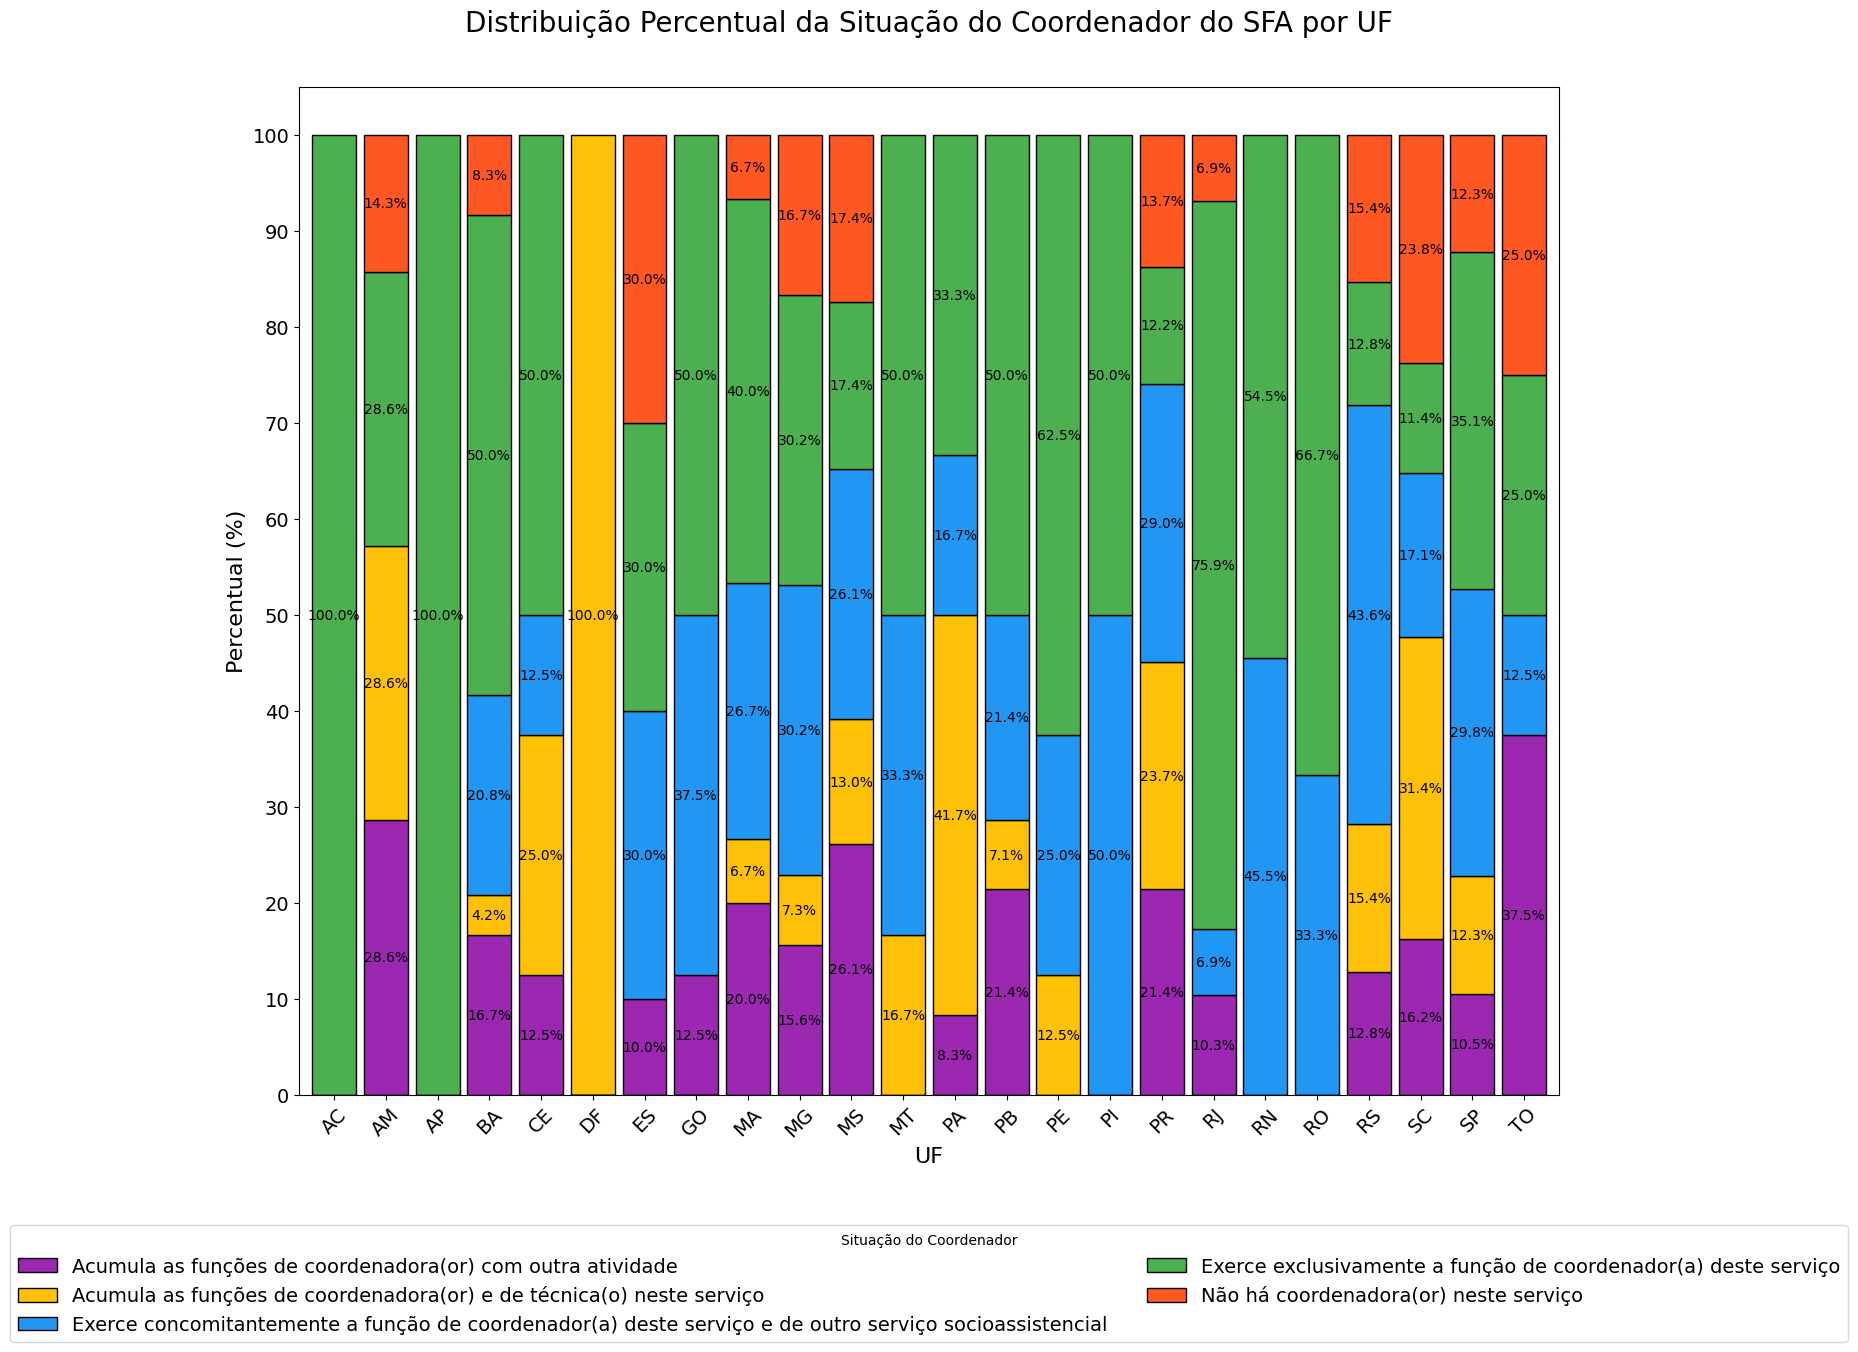

In [76]:
# Definir cores distintas para cada categoria
cores_distintas = {
    'Exerce exclusivamente a função de coordenador(a) deste serviço': '#4CAF50',  # Verde
    'Exerce concomitantemente a função de coordenador(a) deste serviço e de outro serviço socioassistencial': '#2196F3',  # Azul
    'Acumula as funções de coordenadora(or) e de técnica(o) neste serviço': '#FFC107',  # Amarelo
    'Acumula as funções de coordenadora(or) com outra atividade': '#9C27B0',  # Roxo
    'Não há coordenadora(or) neste serviço': '#FF5722',  # Vermelho
}

# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(18, 16))  # Aumentar o tamanho total da figura

# Gráfico de barras empilhadas com cores personalizadas
grafico_data_coordenador_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[cores_distintas[col] for col in grafico_data_coordenador_pct.columns],
    edgecolor='black',
    width=0.85  # Aumentar a largura das barras
)

# Adicionar valores dentro das barras
for i, column in enumerate(grafico_data_coordenador_pct.columns):
    for idx in range(len(grafico_data_coordenador_pct)):
        value = grafico_data_coordenador_pct.iloc[idx, i]
        if value > 0:  # Exibir apenas valores maiores que zero
            cumulative_value = grafico_data_coordenador_pct.iloc[idx, :i].sum()
            ax.text(
                idx, 
                cumulative_value + value / 2,  # Posicionar no meio da barra
                f'{value:.1f}%',  # Formatar para porcentagem
                ha='center',
                va='center',
                fontsize=10,  # Mantém a fonte padrão, menor que o tamanho das barras
                color='black'  # Alterar para preto
            )

# Ajustar rótulos e título
ax.set_title('Distribuição Percentual da Situação do Coordenador do SFA por UF', fontsize=20, pad=40)  # Mais espaço no título
ax.set_xlabel('UF', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_xticks(range(len(grafico_data_coordenador_pct.index)))
ax.set_xticklabels(grafico_data_coordenador_pct.index, rotation=45, fontsize=14)
ax.set_yticks(range(0, 101, 10))  # Definir intervalos de 10% no eixo Y
ax.tick_params(axis='y', labelsize=14)

# Reposicionar e redimensionar a legenda
ax.legend(
    title='Situação do Coordenador',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),  # Empurrar ainda mais para baixo
    ncol=2,  # Ajustar número de colunas
    fontsize=14
)

# Ajustar espaçamento manualmente para maximizar o espaço do gráfico
plt.subplots_adjust(
    top=0.88,  # Espaço superior para o título
    bottom=0.25,  # Espaço inferior para a legenda
    left=0.2,  # Margem esquerda
    right=0.9  # Margem direita
)

# Mostrar o gráfico
plt.show()

### 5.6.3. Capacitação, nos últimos 12 meses, da equipe de profissionais do SFA

In [77]:
colunas_capaci_equipe = ['capaci_equipe_tec_saf_presencial',
    'capaci_equipe_tec_saf_ead',
    'capaci_equipe_tec_saf_nao_faz']

In [78]:
df_dados_gerais[colunas_capaci_equipe].isna().sum()

capaci_equipe_tec_saf_presencial    0
capaci_equipe_tec_saf_ead           0
capaci_equipe_tec_saf_nao_faz       0
dtype: int64

In [79]:
contagem_capaci_equipe = pd.DataFrame({coluna: df_dados_gerais[coluna].value_counts() for coluna in colunas_capaci_equipe})

In [80]:
contagem_capaci_equipe = contagem_capaci_equipe.T

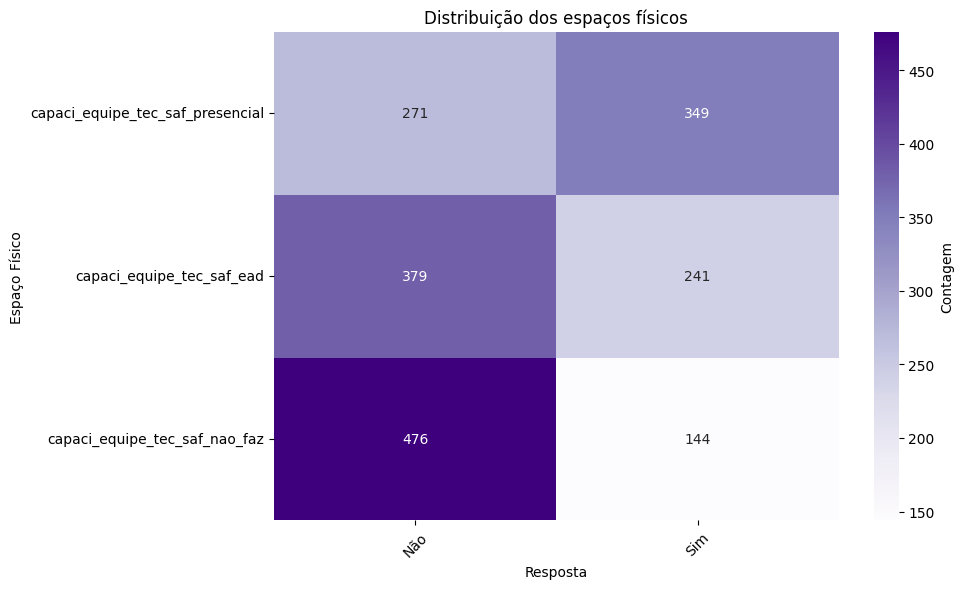

In [81]:
# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    contagem_capaci_equipe,
    annot=True,  # Exibir os valores dentro do heatmap
    fmt=".0f",   # Formato dos números
    cmap="Purples",  # Escolha da paleta de cores
    cbar_kws={'label': 'Contagem'}  # Rótulo da barra de cores
)

# Configurações do gráfico
plt.title("Distribuição dos espaços físicos")
plt.xlabel("Resposta")
plt.ylabel("Espaço Físico")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()